### Title: Thomas Fire False Color Analysis Project
###### Author: Joshua Mull
###### Github: https://github.com/llumj/eds220-hwk4

### About 
#### Purpose:
Using Landsat and Calfire data to examine the Thomas Fire impact area through the use of false color imagery and fire boundary 
#### Highlights: 
Use rioxarray to read in gdb file. Plot red, green, blue variables. Plot short-wave infrared (swir22), near-infrared, and red variables. Plot Thomas Fire boundary with false color landsat image. 
#### About the data: 
The data used in this project includes satellite imagery from the Landsat program and a fire perimeter shapefile for the 2017 Thomas Fire. Satellite Landsat imagery accessed via the server at UCSB. A geodatabase containing all fire boundaries for the state of Califronia, obtained from the California Department of Forestry and Fire Protection (CAL FIRE) https://www.fire.ca.gov.
#### References:
EDS 222 Course Materials. Landsat Data: U.S. Geological Survey. (2024). Landsat 8 Collection 1 Level 1. Retrieved from server UCSB. Thomas Fire Perimeter: California Department of Forestry and Fire Protection. (2024). Thomas Fire Perimeter. Retrieved from https://www.fire.ca.gov/


#### Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import rioxarray as rioxr

#### Create File Path to Landsat Data

In [2]:
# Create file path to landsat data, save as variable root
root = os.path.join('/','courses', 'EDS220', 'data', 'hwk4_landsat_data')

# Use os.path.join to select variable root and file landsat8-2018-01-26-sb-simplified.nc file, save it as variable fp
fp = os.path.join(root,'landsat8-2018-01-26-sb-simplified.nc')

# Use rioxr to open file and save it as color bands 
color_bands = rioxr.open_rasterio(fp)

# Check the variable
color_bands

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

#### Data Exploration Summary 

The data contains variables named "red", "green", "blue", "nir08", "swir22" and has the dimensions (band: 1x: 870y: 731)

#### Drop the Band Dimensions

In [3]:
# Original dimensions and coordinates
print(color_bands.dims, color_bands.coords,'\n')

# Remove length 1 dimension (band)
color_bands = color_bands.squeeze()
print(color_bands.dims, color_bands.coords,'\n')

# Remove coordinates associated to band
color_bands = color_bands.drop_vars('band')
print(color_bands.dims, color_bands.coords)

FrozenMappingWarningOnValuesAccess({'band': 1, 'x': 870, 'y': 731}) Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
    band         int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


#### Select Red, Green, and Blue variables

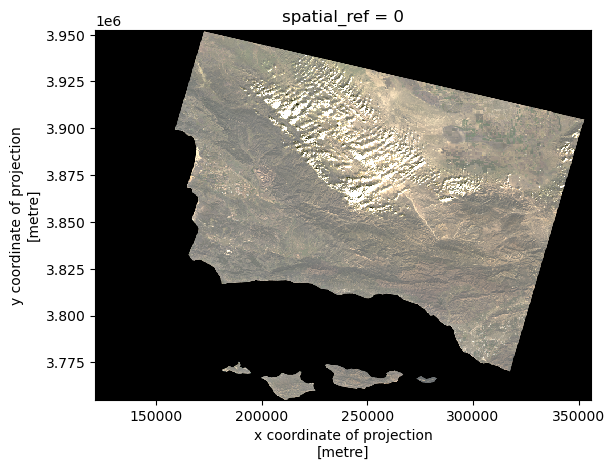

In [4]:
# Convert the selected variables to a NumPy array and plot the RGB image, adjust scale with robust = True 
color_bands[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

#### Brief Explanation of Outputs

#### False Color Image

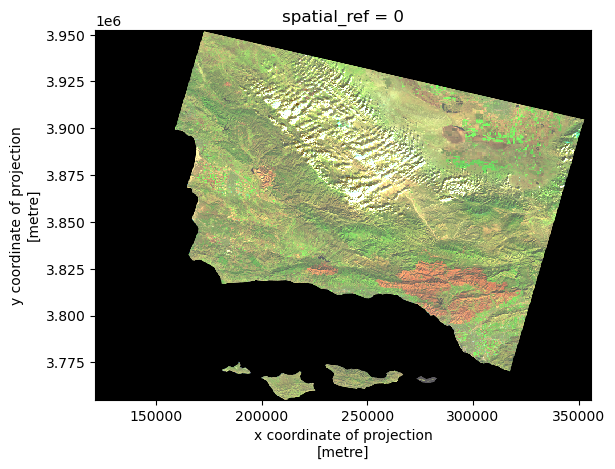

In [5]:
# Create false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables 
color_bands[['swir22', 'nir08', 'blue']].to_array().plot.imshow(robust = True)

## Map with Thomas Fire Boundary 

#### Import Thomas Fire Perimeter and Check CRS's 

In [6]:
# Import Thomas Fire Perimeter
fire_bound = gpd.read_file(os.path.join('data','Thomas_Fire.shp'))

# Check CRS's 
print(fire_bound.crs == color_bands.rio.crs)

False


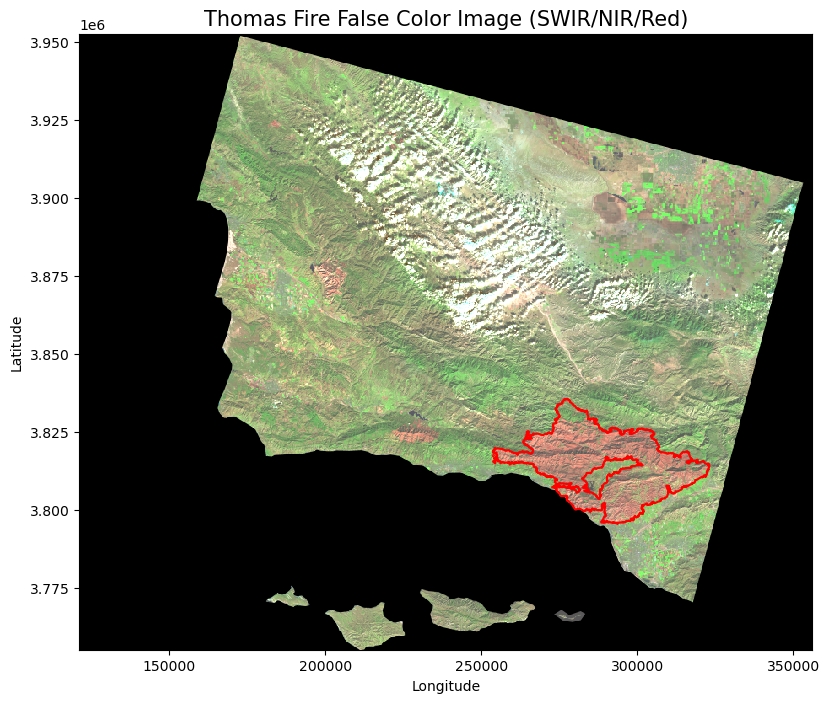

In [12]:
# Ensure CRS matches (transform CRS if necessary)
if fire_bound.crs != color_bands.rio.crs:
    fire_bound = fire_bound.to_crs(color_bands.rio.crs)

# Plot the RGB image with robust scaling
fig, ax = plt.subplots(figsize=(10, 8))
color_bands[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax=ax, robust=True)

# Overlay the fire perimeter
fire_bound.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1.5, label='Thomas Fire Perimeter')

# Customize the plot
ax.set_title('Thomas Fire False Color Image (SWIR/NIR/Red)', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


#### Brief Map Summary

This map illustrates the Thomas Fire perimeter overlaid on a false color image created using shortwave infrared (SWIR), near-infrared (NIR), and red bands from the Landsat satellite imagery. SWIR (Shortwave Infrared) Band: Mapped to the red channel, SWIR is sensitive to moisture content and can distinguish between dry and wet areas, as well as highlight burn scars from wildfires. NIR (Near-Infrared) Band: Mapped to the green channel, NIR is useful for vegetation analysis because healthy vegetation reflects more near-infrared light. Red Band: Mapped to the blue channel, the red band provides detail and clarity to the overall image.